Figures that I want to incldue potentially:



In [1]:
import torch
import torch.nn as nn
import numpy as np

# from utils.adv_trainer import *

import os
import sys
root = os.path.abspath('/home/mbeliaev/home/code/robust-l0/')
sys.path.append(root)

from utils.models import *
from utils.helpers import *
from utils.attack import *

from tqdm import trange
import pickle
import json

import torch

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# colors used
ORANGE = '#FF9132'
TEAL = '#0598B0'
GREEN = '#008F00'
PURPLE = '#8A2BE2'
GRAY = '#969696'
FIG_WIDTH = 3
FIG_HEIGHT = 4
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "lines.linewidth": 2
})

fig_path = os.path.join(root,'figures/')

In [3]:
# data collection for MNIST beta=1
data_keys = ['abs','adv_k0','adv_k12','adv_k50','adv_k100','clean_k0']
# data_keys = ['abs','adv_k0','adv_k12','adv_k50','clean_k0']

data_labels = {
        'abs':'ABS',
        'adv_k0':'$f^{(0)}$',
        'adv_k12':'$f^{(12)}$',
        'adv_k50':'$f^{(50)}$',
        'adv_k100':'$f^{(100)}$',
        'clean_k0':'$f$ (no adv.)'
}

data_colors = {
        'abs':GREEN,
        'adv_k0':GRAY,
        'adv_k12':ORANGE,
        'adv_k50':TEAL,
        'adv_k100':PURPLE,
        'clean_k0':GRAY
}

data_zorder = {
        'abs':1,
        'adv_k0':0,
        'adv_k12':0,
        'adv_k50':0,
        'adv_k100':0,
        'clean_k0':0
}

data_style = {
        'abs':'solid',
        'adv_k0':'solid',
        'adv_k12':'solid',
        'adv_k50':'solid',
        'adv_k100':'solid',
        'clean_k0':'dashed'
}
# k of 0 corresponds to clean accuracy
k_values = [0,5,10,12,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
data_beta_1 = {'abs':[98.000,97.000,90.000,79.000,79.000,66.000,54.000,49.000,35.000,27.000,21.000,19.000,16.000,11.000,8.000,6.000,4.000,3.000,3.000,1.000,1.000,0.000],
        'adv_k0':[98.380,91.000,84.000,81.000,69.000,56.000,32.000,25.000,18.000,17.000,11.000,7.000,7.000,2.000,1.000,2.000,4.000,0.000,1.000,0.000,0.000,1.000],
        'adv_k12':[98.020,91.000,78.000,75.000,67.000,50.000,40.000,37.000,22.000,18.000,15.000,9.000,11.000,7.000,12.000,7.000,6.000,3.000,1.000,1.000,3.000,2.000],
        'adv_k50':[97.750,93.000,91.000,89.000,87.000,84.000,77.000,76.000,73.000,70.000,64.000,67.000,65.000,62.000,58.000,56.000,51.000,49.000,45.000,35.000,29.000,23.000],
        'adv_k100':[88.040,69.000,71.000,67.000,66.000,67.000,59.000,58.000,49.000,55.000,52.000,53.000,49.000,47.000,39.000,45.000,44.000,41.000,42.000,39.000,40.000,36.000],
        'clean_k0':[98.100,33.000,7.000,4.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
}

# # data for CIFAR beta=1
# data_keys = ['adv_k0','adv_k12','adv_k50','adv_k100','clean_k0']
# # k of 0 corresponds to clean accuracy
# k_values = [0,5,10,12,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
# data = {'adv_k0':[87.150,70.000,47.000,43.000,36.000,27.000,17.000,11.000,9.000,6.000,9.000,3.000,2.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000],
#         'adv_k12':[82.690,72.000,62.000,57.000,52.000,49.000,44.000,38.000,30.000,26.000,27.000,23.000,18.000,16.000,18.000,13.000,11.000,8.000,9.000,10.000,9.000,10.000],
#         'adv_k50':[83.000,79.000,76.000,73.000,69.000,64.000,57.000,56.000,51.000,45.000,43.000,42.000,39.000,37.000,36.000,32.000,33.000,30.000,32.000,30.000,28.000,34.000],
#         'adv_k100':[82.140,77.000,74.000,75.000,71.000,66.000,62.000,61.000,52.000,58.000,49.000,50.000,48.000,46.000,46.000,46.000,42.000,41.000,43.000,41.000,37.000,33.000],
#         'clean_k0':[85.610,26.000,9.000,7.000,5.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
# }

# data collection for MNIST beta=100
# data_keys = ['abs','adv_k0','adv_k12','adv_k50','adv_k100','clean_k0']
# k of 0 corresponds to clean accuracy
k_values = [0,5,10,12,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
data_beta_100 = {'abs':[98.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
        'adv_k0':[98.380,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
        'adv_k12':[98.020,95.000,91.000,85.000,45.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
        'adv_k50':[97.750,92.000,94.000,89.000,91.000,88.000,85.000,79.000,81.000,79.000,77.000,74.000,77.000,72.000,73.000,66.000,51.000,27.000,5.000,0.000,0.000,0.000],
        'adv_k100':[88.040,75.000,71.000,67.000,65.000,69.000,63.000,61.000,57.000,51.000,48.000,48.000,47.000,47.000,43.000,46.000,44.000,44.000,44.000,42.000,40.000,44.000],
        'clean_k0':[98.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
}

# # data for CIFAR beta=100
# data_keys = ['adv_k0','adv_k12','adv_k50','adv_k100','clean_k0']
# # k of 0 corresponds to clean accuracy
# k_values = [0,5,10,12,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
# data = {'adv_k0':[87.150,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
#         'adv_k12':[82.690,76.000,69.000,68.000,41.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
#         'adv_k50':[83.000,80.000,77.000,78.000,72.000,69.000,65.000,60.000,58.000,55.000,54.000,51.000,50.000,51.000,47.000,47.000,33.000,20.000,8.000,0.000,0.000,0.000],
#         'adv_k100':[82.140,80.000,76.000,75.000,74.000,72.000,70.000,67.000,65.000,64.000,63.000,64.000,60.000,60.000,59.000,58.000,55.000,56.000,54.000,52.000,52.000,51.000],
#         'clean_k0':[86.610,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]
# }

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


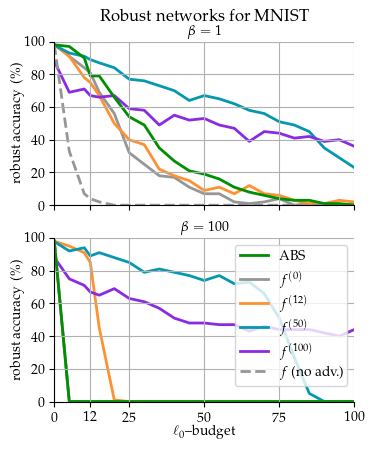

In [4]:
fig_name = 'mnist'

fig = plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
heights = [0.5,0.5]
# 3 SUBPLOTS
widths = [1]
spec = fig.add_gridspec(ncols=len(widths), 
                        nrows=len(heights), 
                        width_ratios=widths,
                        height_ratios=heights,
                        left=0,
                        right=1,
                        top=0.9,
                        bottom=0)

spec.update(wspace=0.15, hspace=0.2)


axs = [fig.add_subplot(spec[i,0]) for i in range(len(heights))]
# axs0 will deal with beta0

# hide other axes
# axs[1].set_yticklabels([])
# axs[0] is without retraining
axs[0].set_title('$\\beta=1$',pad=5)
axs[1].set_title('$\\beta=100$',pad=5)
axs[0].set_xlim(0,100)
axs[0].set_ylim(0,100)
axs[1].set_xlim(0,100)
axs[1].set_ylim(0,100)

# plot with non robust accuracy shown
for key in data_keys:
    axs[0].plot(k_values,
                data_beta_1[key],
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])

    axs[1].plot(k_values,
                data_beta_100[key],
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])

axs[0].grid()
axs[1].grid()
# axs[0].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
# axs[1].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
axs[1].set_xlabel('$\ell_0$--budget',labelpad=0)
axs[0].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[1].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[0].set_xticks([0,12,25,50,75,100])
# axs[0].set_xticklabels([0,12,25,50,75,100])
axs[0].set_xticklabels([])
axs[1].set_xticks([0,12,25,50,75,100])
axs[1].set_xticklabels([0,12,25,50,75,100])
axs[1].legend()

# # plot with non robust accuracy shown
# axs[1].plot(adv_ks,phase[0:11,0],color=GREEN,zorder=10,label='$F^{(0)}$')
# # axs[1].plot(adv_ks,phase[0:11,1],color=ORANGE,linestyle='dashed',zorder=10)
# axs[1].plot(adv_ks,adv_phase,color=ORANGE,zorder=10,label='$F^{(10)}$')
# axs[1].grid()
# axs[1].legend()
# axs[1].set_xlabel('$\ell_0$--budget $(k_{adv})$\n(b)',labelpad=0)
fig.suptitle('Robust networks for MNIST')
# plt.show()
plt.savefig(fig_path+fig_name+'.eps')
plt.savefig(fig_path+fig_name+'.pdf')



In [5]:
# data collection for MNIST beta=1
data_keys = ['adv_k0','adv_k12','adv_k50','adv_k100','clean_k0']
# data_keys = ['abs','adv_k0','adv_k12','adv_k50','clean_k0']

data_labels = {
        'abs':'ABS',
        'adv_k0':'$f^{(0)}$',
        'adv_k12':'$f^{(12)}$',
        'adv_k50':'$f^{(50)}$',
        'adv_k100':'$f^{(100)}$',
        'clean_k0':'$f$ (no adv.)'
}

data_colors = {
        'abs':GREEN,
        'adv_k0':GRAY,
        'adv_k12':ORANGE,
        'adv_k50':TEAL,
        'adv_k100':PURPLE,
        'clean_k0':GRAY
}

data_zorder = {
        'abs':1,
        'adv_k0':0,
        'adv_k12':0,
        'adv_k50':0,
        'adv_k100':0,
        'clean_k0':0
}

data_style = {
        'abs':'solid',
        'adv_k0':'solid',
        'adv_k12':'solid',
        'adv_k50':'solid',
        'adv_k100':'solid',
        'clean_k0':'dashed'
}

# data for CIFAR beta=1
data_keys = ['adv_k0','adv_k12','adv_k50','adv_k100','clean_k0']
# k of 0 corresponds to clean accuracy
k_values = [0,5,10,12,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
data_beta_1 = {'adv_k0':[87.150,70.000,47.000,43.000,36.000,27.000,17.000,11.000,9.000,6.000,9.000,3.000,2.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000],
        'adv_k12':[82.690,72.000,62.000,57.000,52.000,49.000,44.000,38.000,30.000,26.000,27.000,23.000,18.000,16.000,18.000,13.000,11.000,8.000,9.000,10.000,9.000,10.000],
        'adv_k50':[83.000,79.000,76.000,73.000,69.000,64.000,57.000,56.000,51.000,45.000,43.000,42.000,39.000,37.000,36.000,32.000,33.000,30.000,32.000,30.000,28.000,34.000],
        'adv_k100':[82.140,77.000,74.000,75.000,71.000,66.000,62.000,61.000,52.000,58.000,49.000,50.000,48.000,46.000,46.000,46.000,42.000,41.000,43.000,41.000,37.000,33.000],
        'clean_k0':[85.610,26.000,9.000,7.000,5.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
}


data_beta_100 = {'adv_k0':[87.150,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
        'adv_k12':[82.690,76.000,69.000,68.000,41.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000],
        'adv_k50':[83.000,80.000,77.000,78.000,72.000,69.000,65.000,60.000,58.000,55.000,54.000,51.000,50.000,51.000,47.000,47.000,33.000,20.000,8.000,0.000,0.000,0.000],
        'adv_k100':[82.140,80.000,76.000,75.000,74.000,72.000,70.000,67.000,65.000,64.000,63.000,64.000,60.000,60.000,59.000,58.000,55.000,56.000,54.000,52.000,52.000,51.000],
        'clean_k0':[86.610,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


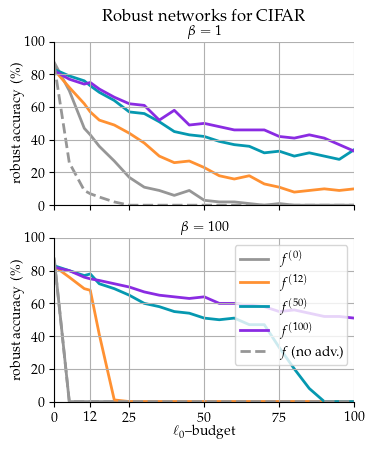

In [6]:
fig_name = 'cifar'

fig = plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
heights = [0.5,0.5]
# 3 SUBPLOTS
widths = [1]
spec = fig.add_gridspec(ncols=len(widths), 
                        nrows=len(heights), 
                        width_ratios=widths,
                        height_ratios=heights,
                        left=0,
                        right=1,
                        top=0.9,
                        bottom=0)

spec.update(wspace=0.15, hspace=0.2)


axs = [fig.add_subplot(spec[i,0]) for i in range(len(heights))]
# axs0 will deal with beta0

# hide other axes
# axs[1].set_yticklabels([])
# axs[0] is without retraining
axs[0].set_title('$\\beta=1$',pad=5)
axs[1].set_title('$\\beta=100$',pad=5)
axs[0].set_xlim(0,100)
axs[0].set_ylim(0,100)
axs[1].set_xlim(0,100)
axs[1].set_ylim(0,100)

# plot with non robust accuracy shown
for key in data_keys:
    axs[0].plot(k_values,
                data_beta_1[key],
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])

    axs[1].plot(k_values,
                data_beta_100[key],
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])

axs[0].grid()
axs[1].grid()
# axs[0].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
# axs[1].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
axs[1].set_xlabel('$\ell_0$--budget',labelpad=0)
axs[0].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[1].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[0].set_xticks([0,12,25,50,75,100])
# axs[0].set_xticklabels([0,12,25,50,75,100])
axs[0].set_xticklabels([])
axs[1].set_xticks([0,12,25,50,75,100])
axs[1].set_xticklabels([0,12,25,50,75,100])
axs[1].legend()

# # plot with non robust accuracy shown
# axs[1].plot(adv_ks,phase[0:11,0],color=GREEN,zorder=10,label='$F^{(0)}$')
# # axs[1].plot(adv_ks,phase[0:11,1],color=ORANGE,linestyle='dashed',zorder=10)
# axs[1].plot(adv_ks,adv_phase,color=ORANGE,zorder=10,label='$F^{(10)}$')
# axs[1].grid()
# axs[1].legend()
# axs[1].set_xlabel('$\ell_0$--budget $(k_{adv})$\n(b)',labelpad=0)
fig.suptitle('Robust networks for CIFAR')
# plt.show()
plt.savefig(fig_path+fig_name+'.eps')
plt.savefig(fig_path+fig_name+'.pdf')

